In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=de5dfc90d12bf115c96ad98ff19c1d8941aa27c44ec91f0921aa90b8d5a9ca50
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


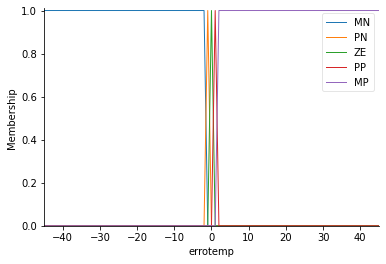

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-45, 46, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
aquecedor =ctrl.Consequent(np.arange(0, 100, 1), 'aquecedor')
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-45, -45, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 45,45])
# You can see how these look with .view()
errotemp.view()

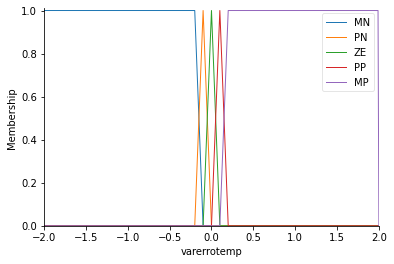

In [ ]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])
# You can see how these look with .view()
varerrotemp.view()

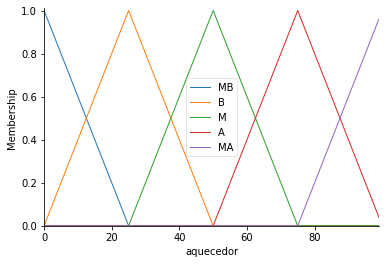

In [ ]:
aquecedor['MB'] = fuzz.trimf(aquecedor.universe, [0,0,25])
aquecedor['B'] = fuzz.trimf(aquecedor.universe, [0,25,50])
aquecedor['M'] = fuzz.trimf(aquecedor.universe, [25, 50, 75])
aquecedor['A'] = fuzz.trimf(aquecedor.universe, [50, 75, 100])
aquecedor['MA'] = fuzz.trimf(aquecedor.universe, [75, 100, 100])
aquecedor.view()

In [ ]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], aquecedor['MA'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], aquecedor['MA'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], aquecedor['A'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], aquecedor['M'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], aquecedor['M'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], aquecedor['MA'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], aquecedor['A'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], aquecedor['A'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], aquecedor['B'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], aquecedor['B'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], aquecedor['MA'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], aquecedor['A'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], aquecedor['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], aquecedor['B'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], aquecedor['MB'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], aquecedor['A'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], aquecedor['A'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], aquecedor['M'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], aquecedor['B'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], aquecedor['MB'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], aquecedor['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], aquecedor['M'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], aquecedor['B'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], aquecedor['MB'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], aquecedor['MB'])

In [ ]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

90.53825136612025


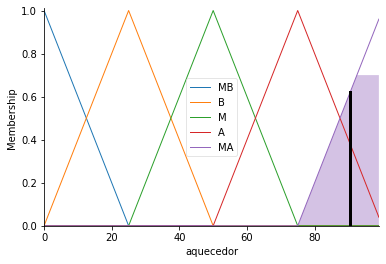

In [ ]:
potencia.input['errotemp'] =-1.7
potencia.input['varerrotemp'] =-1.4
potencia.compute()
print (potencia.output['aquecedor'])
aquecedor.view(sim=potencia)